The objective of the project was to perform sentiment analysis on customer reviews for an e-commerce platform. The goal was to develop machine learning models that could accurately classify reviews as positive, negative, or neutral.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline

In [ ]:
df = pd.read_csv('retail.csv')
df.head()

,product_name,product_price,Rate,Overall_Review,Product_review,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
df.isnull().sum() # finding null value

product_name      0
product_price     0
Rate              0
Overall_Review    0
Product_review    2
Sentiment         1
dtype: int64

In [ ]:
df.dropna(inplace=True)# null value fillup
null_values = df.isnull().sum()
null_values

product_name      0
product_price     0
Rate              0
Overall_Review    0
Product_review    0
Sentiment         0
dtype: int64

<Axes: xlabel='count', ylabel='Rate'>

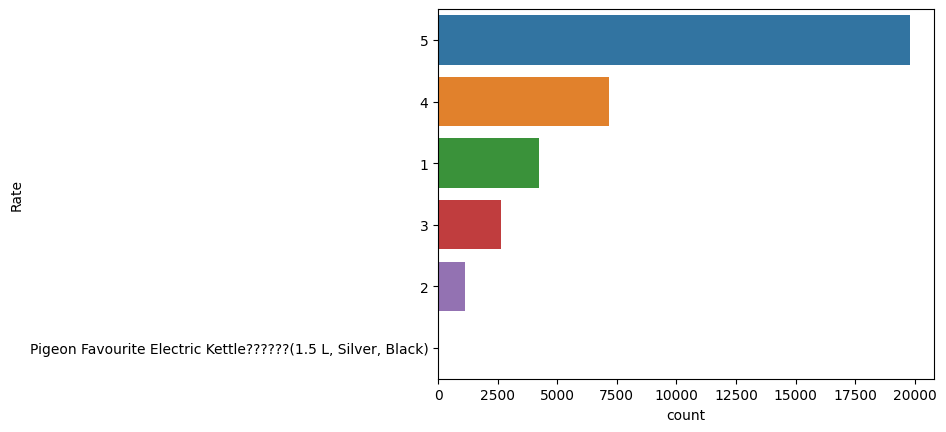

In [ ]:
sns.countplot(data=df, y='Rate', order=df.Rate.value_counts().index)

In [ ]:
df = df[(df.Rate !='Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)') & (df.Rate != "Bajaj DX 2 L/W Dry Iron") & (df.Rate !='Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)')]

<Axes: xlabel='Rate', ylabel='count'>

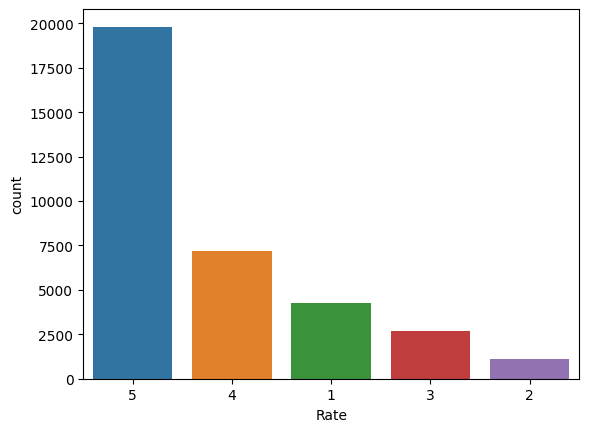

In [ ]:
sns.countplot(data=df, x='Rate', order=df.Rate.value_counts().index)

<Axes: xlabel='Sentiment', ylabel='count'>

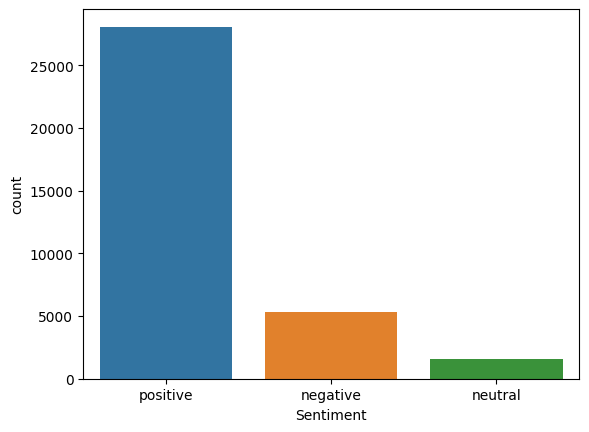

In [ ]:
sns.countplot(data=df, x='Sentiment', order=df.Sentiment.value_counts().index)

text classification

In [ ]:
import nltk
nltk.download('punkt')
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
df['Product_review'] = df['Product_review'].apply(lambda x: x.lower())
df['Product_review'] = df['Product_review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [ ]:
def preprocess_text(text):

    tokens = word_tokenize(text.lower()) #text ko token ki form
                                         #remove punctuation and stop words
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    preprocessed_text = ' '.join(filtered_tokens) #  filtered tokens into a string ko again rejoin
    return preprocessed_text
df['preprocessed_P_review'] = df['Product_review'].apply(preprocess_text)#product review column preprocessed

In [ ]:
df['preprocessed_P_review']

0        great cooler excellent air flow price amazing ...
1                    best budget 2 fit cooler nice cooling
2                            quality good power air decent
3                                          bad product fan
4                                            ok ok product
                               ...                        
35023    perfumes amazing love fragrance mini perfumes ...
35024    ive bought perfume set days ago fragrance perf...
35025    really like perfumes fregrance awesome budget ...
35026        smell perfume set perfect specially like skai
35027                                                 nice
Name: preprocessed_P_review, Length: 35025, dtype: object

In [ ]:
#Converting text into Vectors(number of times in the text a word appears)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [ ]:
#count vectorization
preprocess_review = cv.fit_transform(df['Product_review']) #x independent
y = df['Sentiment']

machine learning classifier

In [ ]:
#Model training, Evaluation, and Prediction
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preprocess_review, y, test_size=0.2, random_state=42)

In [ ]:
#first model naive bayes
#This classifier makes use of a multinomial distribution and is often used to solve issues involving document or text classification.
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
#testing the model
from sklearn.metrics import classification_report,accuracy_score
prediction = nb.predict(X_test) # predictions on the test set
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

    negative       0.78      0.70      0.74      1078
     neutral       0.61      0.06      0.11       335
    positive       0.91      0.97      0.94      5592

    accuracy                           0.89      7005
   macro avg       0.77      0.58      0.60      7005
weighted avg       0.87      0.89      0.87      7005



In [ ]:
prediction = nb.predict(X_test)
print(accuracy_score(y_test,prediction)) #naive bayes accuray

0.88807994289793


In [ ]:
#decision tree 2 model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
prediction = dt.predict(X_test) # predictions on the test set
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

    negative       0.82      0.82      0.82      4904
     neutral       0.52      0.51      0.51      1776
    positive       0.96      0.96      0.96     29396

    accuracy                           0.92     36076
   macro avg       0.77      0.76      0.77     36076
weighted avg       0.92      0.92      0.92     36076



In [ ]:
prediction = dt.predict(X_test)
print(accuracy_score(y_test,prediction))#accuracy dt

0.9198081827253576


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
prediction = rf.predict(X_test) # predictions on the test set
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

    negative       0.86      0.84      0.85      1078
     neutral       0.79      0.44      0.57       335
    positive       0.95      0.98      0.97      5592

    accuracy                           0.93      7005
   macro avg       0.87      0.75      0.79      7005
weighted avg       0.93      0.93      0.93      7005



In [ ]:
prediction = rf.predict(X_test)
print(accuracy_score(y_test,prediction))

0.9339043540328337


In [ ]:
! pip install --user scipy wordcloud nltk seaborn textblob